In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('processed_dataset.csv')

In [35]:
df.sample(5)

,Unnamed: 0,Age,Log_Annual_Premium,Gender_Male,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Region_Code_8,Region_Code_28,Region_Code_46,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152,Target
24427,24446,1.615979,0.512102,1,0,0,0,0,0,0,0,0,0,0,0
25286,25305,-0.392694,0.158554,1,0,0,0,1,0,0,0,0,0,0,1
19033,19050,-1.129208,0.766474,0,0,1,0,0,0,1,0,0,0,0,1
95530,95596,-0.995296,0.049059,1,0,1,0,1,0,0,0,0,0,1,0
55109,55146,0.410775,0.534621,0,0,0,0,1,1,0,0,0,1,0,0


In [36]:
#Separate features and target
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,
                                                    stratify=y,
                                                    random_state= 456)

print(X_train.shape, X_test.shape)

(71596, 13) (30685, 13)


In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 101)
X_train, y_train = sm.fit_resample(X_train, y_train)


#X_train è il dataset senza Target
#y_train è colonna Target

In [38]:
X_train

,Age,Log_Annual_Premium,Gender_Male,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Region_Code_8,Region_Code_28,Region_Code_46,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152
0,-0.392694,-2.108074,1,0,1,0,0,0,0,1,0,0,1
1,-1.263120,0.643090,1,1,1,0,0,0,0,0,0,0,1
2,-1.129208,-2.108074,1,1,1,0,0,0,0,0,0,0,1
3,-0.459650,0.310374,0,1,1,0,0,0,0,0,0,0,1
4,1.749891,0.518787,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97765,0.142952,0.657135,0,0,0,0,1,0,1,0,1,0,0
97766,0.477731,1.140890,0,0,0,0,1,0,1,0,1,0,0
97767,0.343819,0.359963,1,0,0,0,1,0,0,0,0,0,0
97768,-0.617072,-2.108074,1,0,0,0,1,1,0,0,0,0,0


In [43]:
'''
NAIVE BAYES classifier:

(1) Training is fast because only the probability of each class and the probability of each class given different input (x) values need to be calculated. 
(2) No coefficients need to be fitted by optimization procedures!

Bernoulli Naive Bayes: it assumes that all our features are binary.
Multinomial Naive Bayes: it is used when we discrete data
Gaussian Naive Bayes: Naive Bayes can be extended to real-valued attributes, 
    most commonly by assuming a Gaussian distribution.
    we can give prior probabilities of the classes with the parameter 
    priors : array-like, y_pred=shape (n_classes,)
'''

from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [44]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))
print("f1_score: ", f1_score(y_train, y_pred_train))

***RESULTS ON TEST SET***
f1_score:  0.6850841645885287
f1_score:  0.8060853852191213


In [45]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77     20951
           1       0.55      0.90      0.69      9734

    accuracy                           0.74     30685
   macro avg       0.74      0.78      0.73     30685
weighted avg       0.81      0.74      0.75     30685



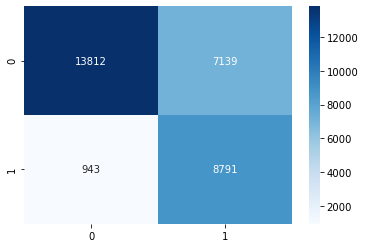

In [46]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


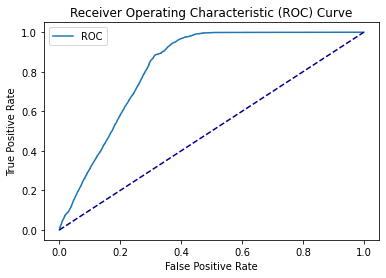

AUC: 0.82


In [11]:
# ROC curve

from sklearn import metrics

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

Naive Bayes:
* High recall -> Low risk of predicting a 0 if the actual value is 1 (profit loss)
* Lower precision -> Many zeros are falsely classified as 1 (exceeding promotional cost)